In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

# Data importation

In [46]:
data = pd.read_csv("1000_companies.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Correlation

<AxesSubplot:>

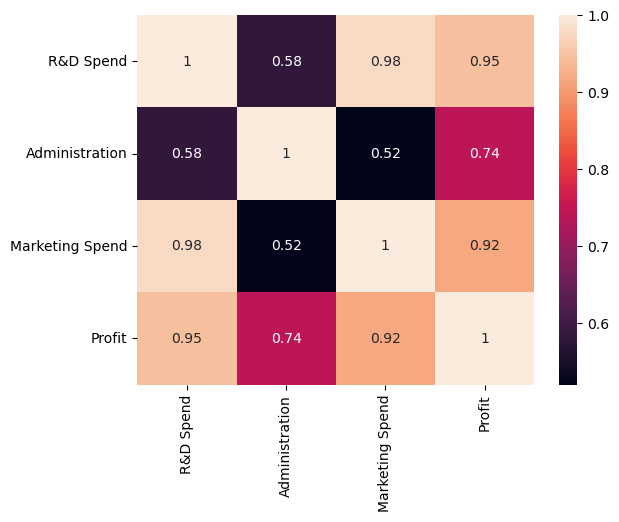

In [47]:
sns.heatmap(data.corr(),annot=True)

In [48]:
#We notice that 'Marketing spend', 'R&D Spend' and 'Profit' are so correlated 
#(Logic, cause the more the company spends on its marketing the better the profit)

In [49]:
data['State']

0        New York
1      California
2         Florida
3        New York
4         Florida
          ...    
995    California
996    California
997    California
998    California
999      New York
Name: State, Length: 1000, dtype: object

In [50]:
#The variable state has 3 different values that strings, so we're going to encode them into 0,1 and 2

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


New york 2

California 0

Florida 1

In [52]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 4].values

In [53]:
#split the dataset into train and test (20% of the dataset is for the test)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [55]:
#Linear regression model

In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [57]:
pred = reg.predict(X_test)

In [58]:
"""check predictions and real values"""
for x in range(len(pred)):
    print(pred[x], X_test[x], Y_test[x])

89624.88499983502 [ 46798.     117368.4374 159075.908       0.    ] 89012.02672
88261.44060358251 [ 45209.     117133.7666 156009.9281      0.    ] 87654.55773
94728.5772384468 [ 52746.     118246.8651 170552.5902      0.    ] 94093.35179
176034.4999095398 [1.47916000e+05 1.32302004e+05 3.54183365e+05 1.00000000e+00] 175396.2616
83234.84214494558 [4.01780000e+04 1.16390766e+05 1.46302600e+05 2.00000000e+00] 83356.61784
110393.04058198779 [7.18290000e+04 1.21065129e+05 2.07373291e+05 2.00000000e+00] 110395.794
131831.18880607467 [7.2107600e+04 1.2786455e+05 3.5318381e+05 2.0000000e+00] 105008.31
91307.52461764621 [ 48759.     117658.0468 162859.6628      0.    ] 90687.2921
164414.26754671332 [1.34787000e+05 1.30363054e+05 3.28850924e+05 2.00000000e+00] 164180.2702
53585.355707426905 [5.21000000e+03 1.11226532e+05 7.88317484e+04 1.00000000e+00] 53483.75718
66786.11950077534 [ 20181.     113437.5176 107718.3338      0.    ] 66273.3533
150921.8970462777 [1.18649000e+05 1.27979720e+05 2.977

In [59]:
print(reg.coef_)

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


In [61]:
print(reg.intercept_)

-51144.72642572186


In [64]:
#accuracy of the model
acc = reg.score(X_test, Y_test)
acc

0.9112595959622046

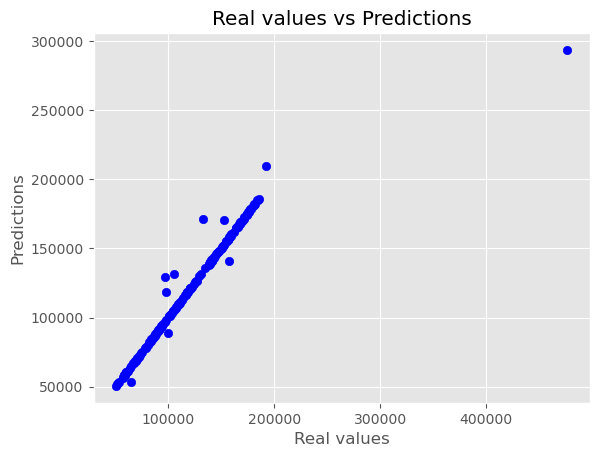

In [83]:
style.use("ggplot")
plt.scatter(Y_test, pred, c='b')
plt.title("Real values vs Predictions")
plt.xlabel("Real values")
plt.ylabel("Predictions")
plt.show()